[[8.42981350e+02]
 [3.24337160e+00]
 [1.77869418e+00]
 [2.75563728e+00]
 [6.91245440e-01]]


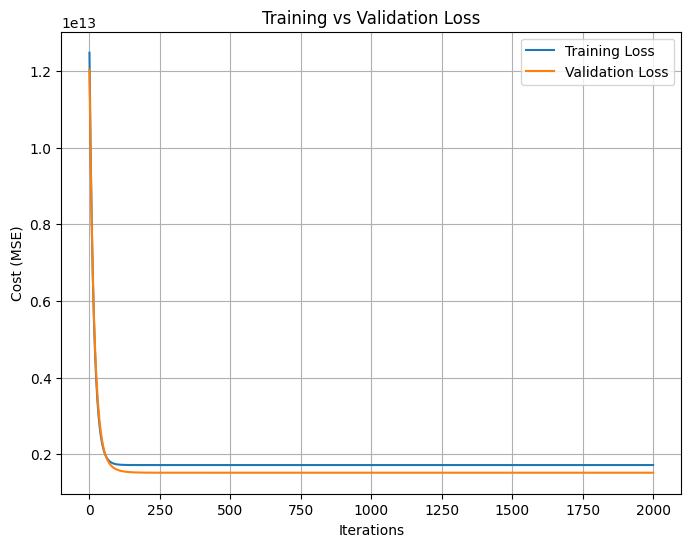

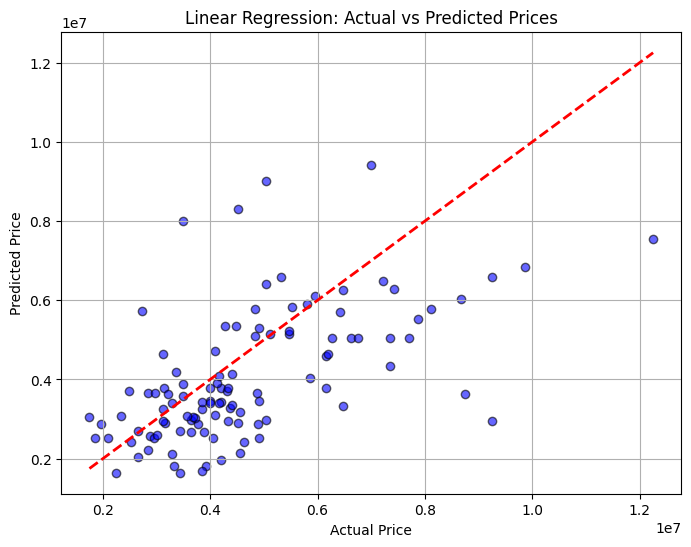

In [75]:
#Problem 1A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?export=download&id=1r0gkZL9150nrhZOtz9fIbVGKMqe45fbG'
df = pd.read_csv(url)

# Features & target
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values.astype(float)
y = df.iloc[:, 0].values.astype(float).reshape(-1, 1)   # target is price (first column in dataset)

np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
X_raw = X[indices]
y = y[indices]

# Train/validation split (80/20)
train_size = int(0.8 * len(X))
X_train, y_train = X_raw[:train_size], y[:train_size]
X_val, y_val = X_raw[train_size:], y[train_size:]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta -= (alpha / m) * X_train.T.dot(errors)

        # record training and validation loss
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

theta = np.zeros((X_train.shape[1], 1))

alpha = 0.000000001      # learning rate
iterations = 2000

# Train model
theta, train_history, val_history = gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations)

print(theta)

# Plot training vs validation loss
plt.figure(figsize=(8,6))
plt.plot(range(iterations), train_history, label="Training Loss")
plt.plot(range(iterations), val_history, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Predict on validation set
y_pred = X_val.dot(theta)

# Plot Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)  # ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.grid(True)
plt.show()



Target scaling: y_mean=$4,788,865.69, y_std=$1,866,736.49
TRAINING WITH STANDARDIZATION
Final Training Cost (scaled): 0.2174
Final Validation Cost (scaled): 0.2323
TRAINING WITH NORMALIZATION


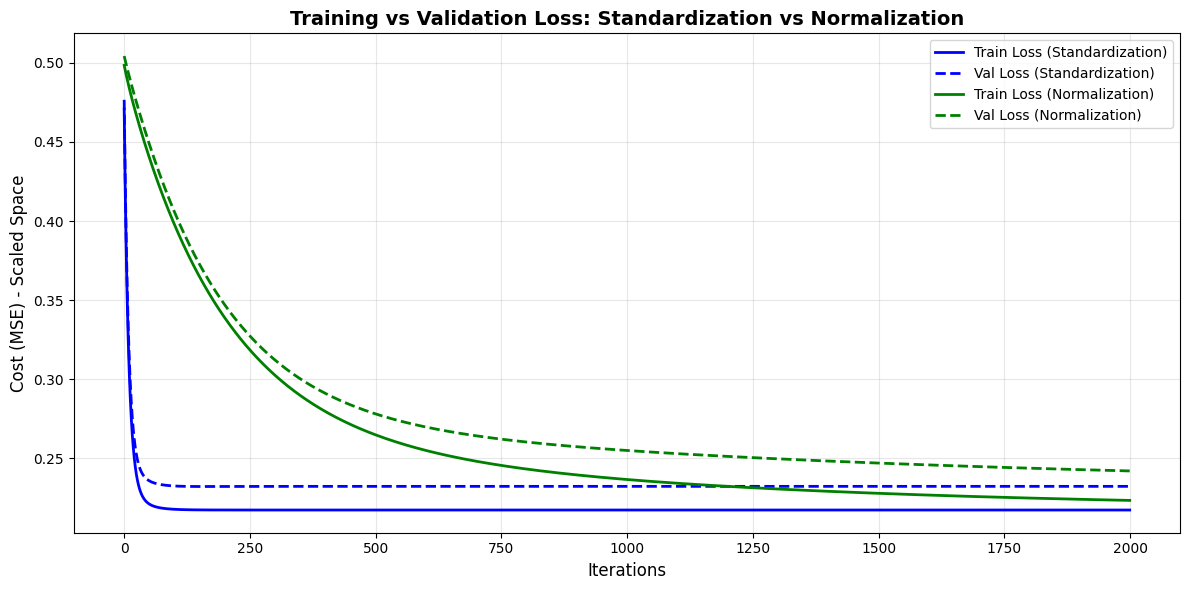

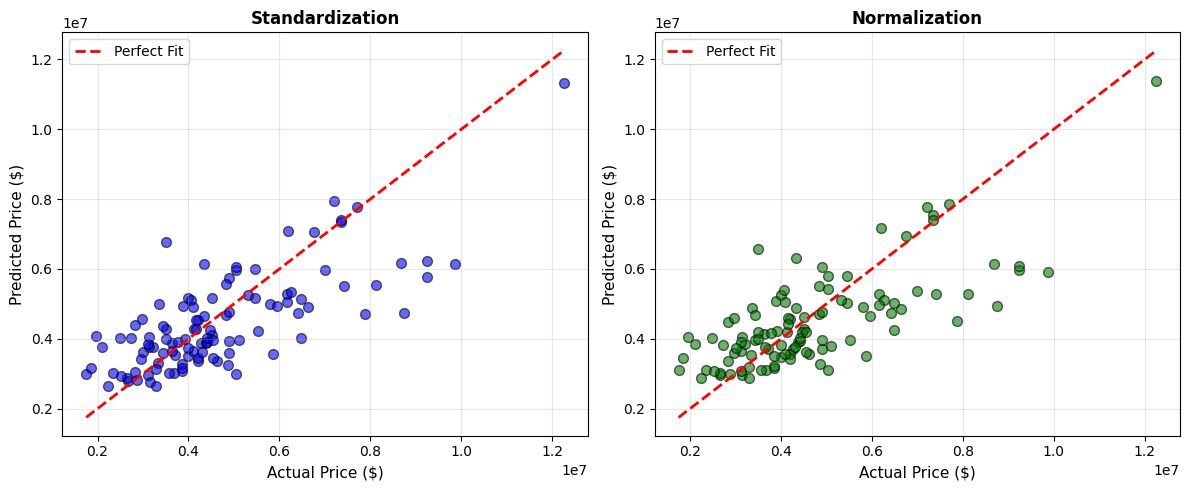

In [76]:
# Problem 2A
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Train/validation split (80/20)
train_size = int(0.8 * len(X_raw))
X_train_raw, y_train = X_raw[:train_size], y[:train_size]
X_val_raw, y_val = X_raw[train_size:], y[train_size:]


y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

print(f"\nTarget scaling: y_mean=${y_mean:,.2f}, y_std=${y_std:,.2f}")

# 3. Scaling methods - Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_raw)
X_val_std = scaler_std.transform(X_val_raw)

# Normalization (min=0, max=1)
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train_raw)
X_val_norm = scaler_norm.transform(X_val_raw)

# 4. Add intercept term (bias)
X_train_std = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_val_std = np.c_[np.ones((X_val_std.shape[0], 1)), X_val_std]

X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_val_norm = np.c_[np.ones((X_val_norm.shape[0], 1)), X_val_norm]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta = theta - (alpha / m) * X_train.T.dot(errors)

        # Record training and validation loss
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

alpha = 0.03
iterations = 2000

print("TRAINING WITH STANDARDIZATION")
#  Train with Standardization
theta_std = np.zeros((X_train_std.shape[1], 1))
theta_std, train_history_std, val_history_std = gradient_descent(
    X_train_std, y_train_scaled, X_val_std, y_val_scaled, theta_std, alpha, iterations
)
print(f"Final Training Cost (scaled): {train_history_std[-1]:.4f}")
print(f"Final Validation Cost (scaled): {val_history_std[-1]:.4f}")

print("TRAINING WITH NORMALIZATION")

# Train with Normalization
theta_norm = np.zeros((X_train_norm.shape[1], 1))
theta_norm, train_history_norm, val_history_norm = gradient_descent(
    X_train_norm, y_train_scaled, X_val_norm, y_val_scaled, theta_norm, alpha, iterations
)

# --- Plot 1: Training vs Validation Loss ---
plt.figure(figsize=(12, 6))
plt.plot(train_history_std, label="Train Loss (Standardization)", linewidth=2, color='blue')
plt.plot(val_history_std, label="Val Loss (Standardization)", linewidth=2, linestyle='--', color='blue')
plt.plot(train_history_norm, label="Train Loss (Normalization)", linewidth=2, color='green')
plt.plot(val_history_norm, label="Val Loss (Normalization)", linewidth=2, linestyle='--', color='green')
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost (MSE) - Scaled Space", fontsize=12)
plt.title("Training vs Validation Loss: Standardization vs Normalization", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Get predictions in scaled space
y_pred_std_scaled = X_val_std.dot(theta_std)
y_pred_norm_scaled = X_val_norm.dot(theta_norm)

# Unscale back to original dollar values
y_pred_std = y_pred_std_scaled * y_std + y_mean
y_pred_norm = y_pred_norm_scaled * y_std + y_mean

# --- Plot 2: Predicted vs Actual ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_std, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Price ($)", fontsize=11)
plt.ylabel("Predicted Price ($)", fontsize=11)
plt.title("Standardization", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_norm, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Price ($)", fontsize=11)
plt.ylabel("Predicted Price ($)", fontsize=11)
plt.title("Normalization", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Training Cost:      0.2174 (scaled, with penalty)
Validation Cost:    0.2323 (scaled, no penalty)

Learned Parameters (θ):
  Intercept   :    -0.0000
  Area        :     0.3795
  Bedrooms    :     0.0694
  Bathrooms   :     0.3042
  Stories     :     0.2794
  Parking     :     0.1694


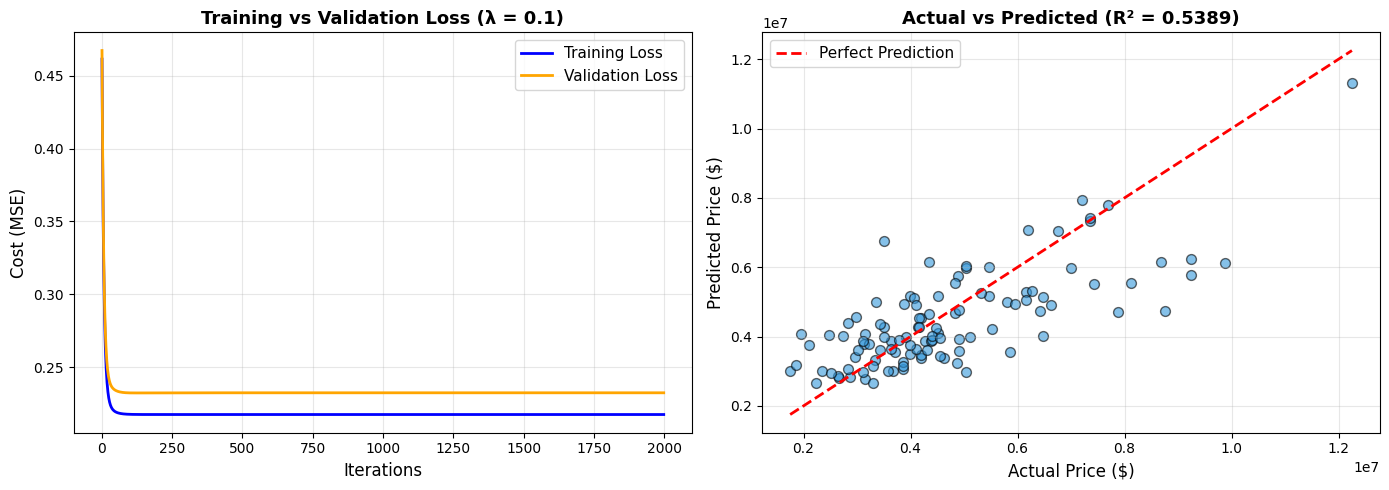

In [77]:
# Problem 3A


train_size = int(0.8 * len(X_raw))
X_train_raw, y_train = X_raw[:train_size], y[:train_size]
X_val_raw, y_val = X_raw[train_size:], y[train_size:]

y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_val_scaled = scaler.transform(X_val_raw)

# Add intercept term
X_train = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

# Cost functions - penalty lambda computed
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    reg_penalty = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
    return J + reg_penalty

def gradient_descent_regularized(X_train, y_train, X_val, y_val, theta, alpha, iterations, lambda_reg):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train

        gradient = (1 / m) * X_train.T.dot(errors)
        gradient[1:] += (lambda_reg / m) * theta[1:]

        theta = theta - alpha * gradient

        # Record costs
        train_cost = compute_cost_regularized(X_train, y_train, theta, lambda_reg)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

alpha = 0.04
iterations = 2000
lambda_reg = 0.1 #Penalty

theta = np.zeros((X_train.shape[1], 1))

theta, train_hist, val_hist = gradient_descent_regularized(
    X_train, y_train_scaled, X_val, y_val_scaled,
    theta, alpha, iterations, lambda_reg
)

y_pred_scaled = X_val.dot(theta)
y_pred = y_pred_scaled * y_std + y_mean  # Unscale to original prices

#  Calculate metrics
ss_res = np.sum((y_val - y_pred) ** 2)
ss_tot = np.sum((y_val - y_val.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)
mae = np.mean(np.abs(y_val - y_pred))
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))

print(f"Training Cost:      {train_hist[-1]:.4f} (scaled, with penalty)")
print(f"Validation Cost:    {val_hist[-1]:.4f} (scaled, no penalty)")

print(f"\nLearned Parameters (θ):")
param_names = ['Intercept', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']
for i, name in enumerate(param_names):
    print(f"  {name:12s}: {theta[i, 0]:10.4f}")

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training vs Validation Loss
axes[0].plot(train_hist, label='Training Loss', linewidth=2, color='blue')
axes[0].plot(val_hist, label='Validation Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Cost (MSE)', fontsize=12)
axes[0].set_title('Training vs Validation Loss (λ = 0.1)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Predicted vs Actual
axes[1].scatter(y_val, y_pred, alpha=0.6, edgecolors='k', s=50, color='#3498db')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Actual vs Predicted (R² = {r2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()